# Midiendo rendimiento y riesgo con datos históricos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/7d/Copper_Price_History_USD.png" width="600px" height="400px" />

> Ya sabemos que podemos caracterizar la distribución de rendimientos de un activo mediante una medida de tendencia central (media: rendimiento esperado) y una medida de dispersión (desviación estándar: volatilidad). 

> En la clase pasada vimos como obtener reportes históricos de precios de activos. ¿Cómo usamos estos históricos para medir el rendimiento esperado y la volatilidad de los rendimientos?

*Objetivos:*
- Calcular los rendimientos a partir de históricos de precios.
- Estimar rendimiento esperado y riesgo a partir de históricos de rendimientos.
- Anualizar rendimiento y volatilidad cuando los datos están en una base de tiempo menor.
- Verificar la relación entre rendimiento y riesgo a través de datos reales.

**Referencias:**
- http://pandas.pydata.org/
- https://pandas-datareader.readthedocs.io/en/latest/
- Notas del curso "Portfolio Selection and Risk Management", Rice University, disponible en Coursera.
___

## 1. Cálculo de los rendimientos

Muy bien, ya entonces sabemos descargar históricos de precios...

**Ejemplo:** trabajaremos esta clase con activos que se encuentran en el top-50 del índice S&P500. Descargar precios ajustados en el cierre de Apple, Walmart, IBM y Nike desde el primero de enero del 2011 hasta el 31 de diciembre del 2015

In [1]:
# Importar paquetes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web

In [3]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [4]:
# Información
names = ['AAPL', 'WMT', 'IBM', 'NKE']
start, end = '2011-01-01', '2015-12-31'

#### Como dijimos la clase pasada, la api de yahoo es inestable. Puede ser que nos toque intentar varias veces antes de tener éxito

In [7]:
# Precios diarios
daily_closes = get_closes(tickers=names, start_date=start, end_date=end, freq='d')
daily_closes

,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-03,31.638695,44.672379,116.819099,17.095957
2011-01-04,31.803814,44.844315,116.945831,16.674967
2011-01-05,32.063969,44.549557,116.478516,16.784182
2011-01-06,32.038055,44.181110,117.753769,16.633265
2011-01-07,32.267494,44.279354,117.175568,16.587587
2011-01-10,32.875168,43.992786,116.945831,16.714678
2011-01-11,32.797409,44.451313,116.660744,16.684893
2011-01-12,33.064281,44.909821,118.102325,16.627302
2011-01-13,33.185257,44.860695,117.880554,16.394960


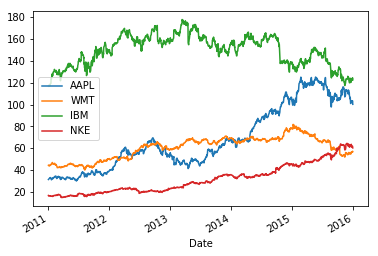

In [8]:
# Gráfico de histórico de precios diarios
daily_closes.plot();

### 1.1. Rendimientos porcentuales

Muy bien, pero para el análisis no trabajamos con los precios sino con los rendimientos... **¿porqué?**

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

*¡Cuidado!* los rendimientos son de acuerdo a la base de tiempo en que se reportan los precios. Por ejemplo: 
- si los precios se reportan en una base diaria, los rendimientos también son diarios;
- si los precios se reportan en una base mensual, los rendimientos también son mensuales.

In [11]:
# Método shift() de un DataFrame...
help(pd.DataFrame.shift)

Help on function shift in module pandas.core.frame:

shift(self, periods=1, freq=None, axis=0)
    Shift index by desired number of periods with an optional time freq
    
    Parameters
    ----------
    periods : int
        Number of periods to move, can be positive or negative
    freq : DateOffset, timedelta, or time rule string, optional
        Increment to use from the tseries module or time rule (e.g. 'EOM').
        See Notes.
    axis : {0 or 'index', 1 or 'columns'}
    
    Notes
    -----
    If freq is specified then the index values are shifted but the data
    is not realigned. That is, use freq if you would like to extend the
    index when shifting and preserve the original data.
    
    Returns
    -------
    shifted : DataFrame



In [12]:
daily_closes

,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-03,31.638695,44.672379,116.819099,17.095957
2011-01-04,31.803814,44.844315,116.945831,16.674967
2011-01-05,32.063969,44.549557,116.478516,16.784182
2011-01-06,32.038055,44.181110,117.753769,16.633265
2011-01-07,32.267494,44.279354,117.175568,16.587587
2011-01-10,32.875168,43.992786,116.945831,16.714678
2011-01-11,32.797409,44.451313,116.660744,16.684893
2011-01-12,33.064281,44.909821,118.102325,16.627302
2011-01-13,33.185257,44.860695,117.880554,16.394960


In [13]:
daily_closes.shift()

,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-03,NaN,NaN,NaN,NaN
2011-01-04,31.638695,44.672379,116.819099,17.095957
2011-01-05,31.803814,44.844315,116.945831,16.674967
2011-01-06,32.063969,44.549557,116.478516,16.784182
2011-01-07,32.038055,44.181110,117.753769,16.633265
2011-01-10,32.267494,44.279354,117.175568,16.587587
2011-01-11,32.875168,43.992786,116.945831,16.714678
2011-01-12,32.797409,44.451313,116.660744,16.684893
2011-01-13,33.064281,44.909821,118.102325,16.627302


In [15]:
# Calcular los rendimientos
daily_ret = ((daily_closes-daily_closes.shift())/daily_closes.shift()).dropna()
daily_ret

,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-04,0.005219,0.003849,0.001085,-0.024625
2011-01-05,0.008180,-0.006573,-0.003996,0.006550
2011-01-06,-0.000808,-0.008270,0.010948,-0.008992
2011-01-07,0.007161,0.002224,-0.004910,-0.002746
2011-01-10,0.018832,-0.006472,-0.001961,0.007662
2011-01-11,-0.002365,0.010423,-0.002438,-0.001782
2011-01-12,0.008137,0.010315,0.012357,-0.003452
2011-01-13,0.003659,-0.001094,-0.001878,-0.013974
2011-01-14,0.008100,0.000365,0.007929,0.018290


In [17]:
# Otra forma (más fácil)
daily_ret = daily_closes.pct_change().dropna()
daily_ret

,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-04,0.005219,0.003849,0.001085,-0.024625
2011-01-05,0.008180,-0.006573,-0.003996,0.006550
2011-01-06,-0.000808,-0.008270,0.010948,-0.008992
2011-01-07,0.007161,0.002224,-0.004910,-0.002746
2011-01-10,0.018832,-0.006472,-0.001961,0.007662
2011-01-11,-0.002365,0.010423,-0.002438,-0.001782
2011-01-12,0.008137,0.010315,0.012357,-0.003452
2011-01-13,0.003659,-0.001094,-0.001878,-0.013974
2011-01-14,0.008100,0.000365,0.007929,0.018290


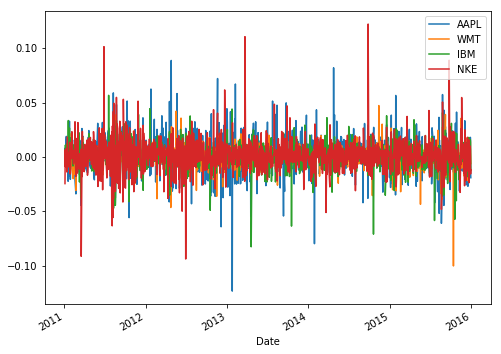

In [18]:
# Graficar...
daily_ret.plot(figsize=(8,6));

**¿Qué se observa respecto a los precios?**

Respuestas:
- Los rendimientos parecen conservar tendecias estadísticas constantes (por ejemplo, oscilan al rededor de números cercanos a cero). 

Típicamente se reportan rendimientos en una base anual. ¿Cómo los obtenemos? <font color=blue>(ver en el tablero)</font>

In [19]:
# Método groupby() de un DataFrame
help(pd.DataFrame.groupby)

Help on function groupby in module pandas.core.generic:

groupby(self, by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, observed=False, **kwargs)
    Group series using mapper (dict or key function, apply given function
    to group, return result as series) or by a series of columns.
    
    Parameters
    ----------
    by : mapping, function, label, or list of labels
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        aligned; see ``.align()`` method). If an ndarray is passed, the
        values are used as-is determine the groups. A label or list of
        labels may be passed to group by the columns in ``self``. Notice
        that a tuple is interpreted a (single) key.
    axis : int, default 0
    level : int, l

In [20]:
# Crear una función que calcule rendimientos anuales a partir de rendimientos diarios
def calc_annual_ret(ret):
    return (1+ret).groupby(lambda date: date.year).prod()-1

In [21]:
# Calcular rendimientos anuales y mostrar
annual_ret = calc_annual_ret(daily_ret)
annual_ret

,AAPL,WMT,IBM,NKE
2011,0.228874,0.125302,0.267899,0.187260
2012,0.399063,0.169853,0.059249,0.135759
2013,0.258354,0.181637,-0.001776,0.566323
2014,0.509187,0.118709,-0.123871,0.260339
2015,-0.030137,-0.266366,-0.107400,0.327882


### 1.2. Rendimientos logarítmicos (log-rendimientos)

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

<font color=blue>Ver en el tablero</font> que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

In [24]:
# Calcular rendimientos continuamente compuestos
daily_logret = np.log(daily_closes/daily_closes.shift()).dropna()
daily_logret

,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-04,0.005205,0.003841,0.001084,-0.024933
2011-01-05,0.008147,-0.006595,-0.004004,0.006528
2011-01-06,-0.000809,-0.008305,0.010889,-0.009032
2011-01-07,0.007136,0.002221,-0.004922,-0.002750
2011-01-10,0.018657,-0.006493,-0.001963,0.007633
2011-01-11,-0.002368,0.010369,-0.002441,-0.001784
2011-01-12,0.008104,0.010262,0.012281,-0.003458
2011-01-13,0.003652,-0.001094,-0.001880,-0.014072
2011-01-14,0.008067,0.000365,0.007898,0.018125


In [25]:
# Recordar rendimientos porcentuales. Ver que son similares
daily_ret

,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-04,0.005219,0.003849,0.001085,-0.024625
2011-01-05,0.008180,-0.006573,-0.003996,0.006550
2011-01-06,-0.000808,-0.008270,0.010948,-0.008992
2011-01-07,0.007161,0.002224,-0.004910,-0.002746
2011-01-10,0.018832,-0.006472,-0.001961,0.007662
2011-01-11,-0.002365,0.010423,-0.002438,-0.001782
2011-01-12,0.008137,0.010315,0.012357,-0.003452
2011-01-13,0.003659,-0.001094,-0.001878,-0.013974
2011-01-14,0.008100,0.000365,0.007929,0.018290


In [26]:
# Veamos el valor absoluto de la diferencia
np.abs(daily_ret-daily_logret)

,AAPL,WMT,IBM,NKE
Date,,,,
2011-01-04,1.357123e-05,7.387762e-06,5.880319e-07,3.082696e-04
2011-01-05,3.327481e-05,2.169675e-05,8.005323e-06,2.135568e-05
2011-01-06,3.267672e-07,3.439031e-05,5.949980e-05,4.066859e-05
2011-01-07,2.552142e-05,2.468685e-06,1.209491e-05,3.777680e-06
2011-01-10,1.751341e-04,2.103302e-05,1.924535e-06,2.920263e-05
2011-01-11,2.801695e-06,5.394264e-05,2.976198e-06,1.589591e-06
2011-01-12,3.292676e-05,5.283491e-05,7.572498e-05,5.970809e-06
2011-01-13,6.677172e-06,5.987245e-07,1.765252e-06,9.854881e-05
2011-01-14,3.262660e-05,6.661131e-08,3.126848e-05,1.652525e-04


Por lo anterior, muchas veces se usan para el análisis los rendimientos continuamente compuestos.
___

## 2. Caracterización de la distribución de los rendimientos

Entonces:
- partimos de que tenemos los rendimientos porcentuales diarios de Apple, Walmart, IBM y Nike desde inicios del 2011 a finales del 2015;
- ¿cómo resumirían estos datos?

In [27]:
# Rendimiento medio diario (media aritmética)
daily_ret.mean()

AAPL    0.001062
WMT     0.000246
IBM     0.000112
NKE     0.001117
dtype: float64

In [28]:
# Volatilidad diaria (desviación estándar)
daily_ret.std()

AAPL    0.016996
WMT     0.010152
IBM     0.012133
NKE     0.015056
dtype: float64

In [29]:
# Podemos resumir en un DataFrame
daily_ret_summary = pd.DataFrame(index=['Mean', 'Volatility'], columns=names)
daily_ret_summary.loc['Mean']=daily_ret.mean()
daily_ret_summary.loc['Volatility']=daily_ret.std()
daily_ret_summary

,AAPL,WMT,IBM,NKE
Mean,0.00106192,0.000246175,0.000111607,0.00111744
Volatility,0.0169958,0.0101519,0.0121334,0.0150561


Normalmente se reportan rendimientos esperados y volatilidades en una base anual. Para anualizar:

$$E[r_a]=12E[r_m]=252E[r_d]=52E[r_w],\text{ y}$$

$$\sigma_{r_a}=\sqrt{12}\sigma_{r_m}=\sqrt{252}\sigma_{r_d}=\sqrt{52}\sigma_{r_w}$$

In [19]:
# Resumen en base anual


In [20]:
# Gráfico rendimiento esperado vs. volatilidad


**¿Qué se puede concluir acerca de la relación entre riesgo (medido con la volatilidad) y el rendimiento esperado (medido con la media)?**
Respuestas:
- 
- 
___

## 3. Comentarios finales acerca del uso de datos históricos.

### ¡Cuidado!
- Es cierto que los patrones que vemos sobre periodos largos de tiempo en diferentes tipos de intrumentos son muy robustos en términos de la relación rendimiento/riesgo (positiva).
- Por tanto, esperamos rendimientos más altos en el futuro cuando asumimos cierto riesgo.
- ¿Cómo encontramos ese 'rendimiento esperado' en el futuro'? Datos históricos (humanos: tendencia a generalizar)

- Entonces, la idea es que si los rendimientos esperados son un p.e. estacionario, el promedio de muchos rendimientos pasados es una buena estimación del rendimiento esperado futuro (Teorema del límite central).
- ¿Deberíamos pensarlo dos veces?

## SI

Problemas:
- La muestra de datos en el periodo específico de tiempo puede estar sesgada.
- Ventanas de tiempo más grabdes reducen especificidad de la muestra y estimados más precisos.
 - Aún así, datos muy viejos pueden ser no representativos.
- Nuevos fondos o estrategias de inversión están a menudo sesgados positivamente:
 - reporte de resultados en tiempos voluntarios;
 - las que mueren (no funcionan), no se reportan;

# Anuncios parroquiales:
## 1. Fin Módulo 1. Revisar que se hayan cumplido los objetivos del módulo (Clase0)
## 2. Tarea: revisar archivo "Tarea3_MidiendoRendimientoRiesgo" en clase.
## 3. Recordar quiz la siguiente clase.
## 4. Para hoy en la noche tengo realimentación de las tareas de github colaborativo. Segunda entrega para el miércoles 5 de septiembre.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>